# Table of content

1. [Table of content](#Table-of-content)
2. [Relational Databases](#Relational-Databases)
    1. [Summary of General Database Rules](#Summary-of-General-Database-Rules)
    2. [Links](#Links)
    3. [Some important terms](#Some-important-terms)
    4. [Problems that Databases have to solve](#Problems-that-Databases-have-to-solve)
    5. [Tables](#Tables)
        1. [Primary Keys and Foreign Keys](#Primary-Keys-and-Foreign-Keys)
    6. [Visualizing Databases](#Visualizing-Databases)
        1. [ER diagram](#ER-diagram)
        2. [Relational Scheme](#Relational-Scheme)
    7. [Designing a Database](#Designing-a-Database)
        1. [Gather information](#Gather-information)
        2. [Design the tables](#Design-the-tables)
        3. [Modell the Relations between the tables](#Modell-the-Relations-between-the-tables)
             1. [one-to-many](#one-to-many)
             2. [many-to-many](#many-to-many)
             3. [one-to-one](#one-to-one)
        5. [Refine the database](#Refine-the-database)
             1. [Normalization Rules](#Normalization-Rules)    
3. [Exercises](#Exercises)
    1. [Exercise 1 - Design Tables](#Exercise-1---Design-Tables)
    2. [Exercise 2 - Table design](#Exercise-2---Table-design)
    3. [Exercise 3 - One-to-Many](#Exercise-3---One-to-Many)
    4. [Exercise 4 - Many-to-Many](#Exercise-4---Many-to-Many)

# Relational Databases

## Summary of General Database Rules

1. Each Table needs a Primary Key at all time, to uniquely identify each row in it
2. Make sure that the data in your table depends only on the primary key
3. Reduce redundancy to a level of foreign key values
4. Each field can contain only exact one value, even though this value could contain multiple words, e.g. homo sapiens
5. Avoid empty fields as much as possible
6. Model all relations before entering data into your database

## Links

Codd's 12 rules:     
https://en.wikipedia.org/wiki/Codd%27s_12_rules

Visualizing Databases:    
https://erdplus.com/standalone

## Some important terms

Datbases are collectinos of two-dimensional *tables*, also called *entities* or *classes*

They contain:

- Columns, also called *attributes*
- Rows, also called *tuples*, *records* or *instances* (no relation to tuple in Python)

To interact with a database we use a Relational Database Management System (RDBMS). This contains:
- a collection of objects or relations
- set of operations to act on the relations
- data integrity for accuracy and consistency

Ideally a database conforms to Codd's 12 rules. However, this is in practise almost impossible

https://en.wikipedia.org/wiki/Codd%27s_12_rules

## Problems that Databases have to solve
- Redundancy: to have multiple entries containing the same information in our data collection
- Inconsistency: informations referring to a specific topic contradictseach other
- Merging Data
- Expanding the Collection
- Multiple Users: e.g. generating new entries in a data collection simultaneously
- Lost Update: Losing data when only the last changes are saved
- Loss of data: If data is lost, the correlations in the data system often can't be reproduced
- Breach of Integrity: A new entry has to fulfill all criteria defined by the database
- Safety concerns: only granting access where necessary

## Tables

Tables, somtimes also called classes, contain:

- Columns, also called *attributes*
  - Describe the dataset
  - Can only contain *one value per row*
- Rows
  - Each row corresponds to one dataset of this table
  - Each row has to be uniquely identified fom other rows

Tables can be described through Class diagrams
- Name of table is writen above a rectangular box
- the column names are written inside the box

### Primary Keys and Foreign Keys

Each row in a table needs to be uniquely identified. This is done through one or several **primary key (PK)**
- column or set of columns uniquely identifying each row
  - if the primary key is formed by several columns it is a *composite* primary key
- cannot contain empty values or duplicates
- value for the primary key should ideally never change and is best auto generated

A **foreign key (FK)** is a column or combination of columns in a table that refers to the primary key of another table
- A foreign key must match an existing primary key value or be empty
- A foreign key can be (part of) the primary key, but then it can't be empty
- The columnd containing the foreign key must be formatted exactly the same as the primary key it points to (e.g. containing strings, numbers etc.)

## Visualizing Databases

Databases can be easily visualized on the following website:

https://erdplus.com/standalone

### ER diagram

ER = entity relationship diagram

- Tabels are Rectangles
- Columns are Circles
  - if the columns are underlined, they are the Primary Key(s)
- Diamonds are the relations between tables
- Connection line with one line and a vertical bar represents a one-end 
- Connection line with three lines represents a many-end

### Relational Scheme

- Class diagramms representing the tables
  - Name of table is writen above a rectangular box
  - inside the box are written the column names
  - Primary Key(s) in bold and underlined 
- Foreign keys are linked to their Primary Key location in their "home table" through arrows. This is usually a one-to-many relationship
- In a relational scheme we see a hierachy: the highest point in the database hierachy are tables that contain only primary keys and no foreign keys. We then go down to tables only containing foreign keys pointing to the highest level and so on down

## Designing a Database

There are four steps to designing a database:
1. Gather information
2. Design the tables
3. Modell the relations between the tables
4. Refine the database

### Gather information

The most important step is to gather information about the requirements and objectives of the database!! Possible questions to ask:
- What do we need to save?
- What relations are of interest?
- What kind of diagrams, tables are needed?
- Are there any external applications that need to be included?
- Is there example data?

### Design the tables

Gather the needed data into seperate tables
- What topics are there? (= how many tables)
- Which columns do I need in each table?
- After thinking about the needed columns pick a primary key
- Only if no column(s) fulfils the criteria of a primary key add an extra column (or if the composite primary key would consist of too many columns)

### Modell the Relations between the tables

There are three (important for us) types of relations that exist between tables:
1. one-to-many
2. many-to-many
3. one-to-one

|Table 1 (T1)| Table 2 (T2)| Relationship|
|:--|:--|:--|
|Points to one entry in T2 |Points to one entry in T1| One-to-One|
|Points to many entries to T2 |Points to one entry in T1 |One-to-Many||
|Points to many entries to T2| Points to many entries to T1 |Many-to-Many|

#### one-to-many

> Example:
> A teacher may teach 0 or more classes, but a class (one lesson at one time) is only taught by one teacher.

one-to-many relationship *cannot* be represented in a single table:

If we have a table called `teacher`, we would need several columns for the classes (`class1`,`class2`, etc.)
- we don't know how many columns we might need at max
- we have a lot of emtpy fields

-> not a good solution

If we have a table called `class` the information about `teacher` (name, room, email etc.) is repeated many times
- there is a lot of redundant data -> redundancy has to be minimized as much as possible

> Solution: two tables!
> - a table `teacher` with `teacherID` as primary key (parent table/one-end)
> - a table `classes` with `classID` as primary key referencing `teacherID` as foreign key (child table/many-end)

The primary key of the parent table (where it is unique = one) becomes the foreign key in the child table (where it can occur multiple times = many)

#### many-to-many

> Example:
> In a sales database a customers order may contain many products and a product may occur in many orders

We start with two tables

> - `Products`, containing e.g. ProductID, ProductName, Description and QuantityInStock
> - `Orders`, containing e.g. OrderID, CustomerID, DateOrdered, DateRequired and Status (but not the actual products!)

We then make a third table connecting the two main tables: a **junction table** or **relationship table**

> - `OrderDetails`, containing ProductID, OrderID and e.g. Quantity
>  
> In this instance the two foreign keys (ProductID and OrderID) form a composite primary key

- The many-to-many relationship is thus established by two one-to-many relationships to the junction table.
- The primary key of the junction table is often a composite the foreign keys from the parent tables, but it *doesn't have to be*

#### one-to-one

> Example:
> In a sales database you might have supplementary information for only some products (e.g. image, more description, comments). This would lead to many empty fields for the products that don't have this information. This would decrease the performance of the database
>
> Solution:
> Have a child table (e.g. ProductDetails) that stores the optional data. One row in ProductDetails points to one row in Products.

The primary key of the parent table is also the primary key of the child table. Not a hard rule, but try to do it that way...

Uses:
- optional data not present for all rows
- splitting the table in two so it doesn't become too big (some databases don't allow more than x columns)
- security: sensitive data is stored in an extra table while the main data is accessible to more/all people

### Refine the database

Before adding data go through everything again and double check, e.g.
- do I need more columns?
- do I need to create a new table for optional data?
- do I need to split an overly large table?

Apply the *normalization rules* whether the database is structurally correct and optimal. 

**Functionality always beats these rules!!**

#### Normalization Rules

1. A database in the first normal form has one table with columns containing atomic values (= split as much as possible) and a unique primary key is used
   - This often contains a lot of redundancy
2. A database is in it‘s second normal form if the first normal form is fulfilled and each non-key column is functionally fully dependent from the primary key
3. A database is in it‘s third normal form if the second normal form is fulfilled and no non-key column depends transitively from a key column or no non-key column depends on another non-key column

Try to keep redundancy to the level of foreign keys. If there is redundandy in a column that is not a foreign key cosider making an extra table



# Exercises

## Exercise 1 - Design Tables

### A student at a university
- Name
- First Name
- Date of Birth
- Road
- Number
- Postal Code
- City
- Email Adresse
- Faculty
- Degree
- Thesis advisor
- Grade average

### A faculty member at a university
- Name
- First Name
- Title
- Room
- Date of Birth
- Road
- Number
- Postal Code
- City
- Email Adresse
- Telefon Work
- Telefon Private
- Faculty
- Chair/Working group
- Vacation days left

### A work of art displayed in a gallery or museum
- Title
- Description
- Artist
- Genre
- Date of Creation
- Place of Creation
- Value
- Insurance value
- Room it is placed

### An automobile registered with the Motor Vehicle Department
- Manufacturer
- Modell
- Color
- Registration Number
- License Plate
- Date of first registration
- Date of last registration
- Last Name Owner
- First Name Owner
- Adress Owner
- Type of engine

### A pizza that is on the menu in a restaurant
- Name
- Size
- Price
- Sauce
- Topping1
- Topping2

### Household furniture
- Name
- Main Function
- Room
- Weight
- Height
- Depth
- Width
- Color
- Material
- Age
- Designer


## Exercise 2 - Table design

Design tables for the following topics:
- Cell cultures
- Laboratory animals
- Isolation experiments
- Western Blot Results
- Protein concentration measurements
Don’t forget to include a primary key for each table

### Cell culture

- **Cell_ID**
- Cellline
- Subclone
- Medium
- Flask_type
- Growth_type (Adherent/Semi-adherent/Suspension)
- Split_ratio
- Dissociation_method
- Split_Frequency
- MediumChange_Frequency
- Max_Passages
- Contamination_Status
- No_frozen_vials
- Biosafety_Level

### Laboratory animals

- **AnimalID**
- Organism
- Sex
- Date_Birth
- Age (not a good idea, because we don't calculate in our table!!)
- ExperimentID (FK)
- Health_status
- Biosafety_Level
- Cage_number
- Marking
- Handler
- PI
- Veterinarian

### Isolation Experiments

- **SampleID**
- ExperimentID (FK)
- OriginMaterial (Cells/tissue) (FK)
- TreatmentMaterial (FK)
- IsolationDate
- Experimentor
- IsolationMethod
- QualityOK

### Western Blot Result

- **BandID**
- Protein
- ProteinWeight.kDa
- RawDensity
- DensitometryMethod
- PrimAntibody (FK)
- SecAntibody (FK)
- OriginMaterial (FK)
- TreatmentMaterial (FK)
- ExperimentID (FK)
- DevelopDate
- DevelopMethod

### Protein Concentration Measurements

- **SampleID** (FK)
- Concentration
- MeasurementDate
- MeasurementMethod
- Experimentor (FK)
- SampleDilution
- RawValue

## Exercise 3 - One-to-Many

Create a relational scheme for each of the relations described below:
1. Organisms and Kingdoms of Life
2. Protein sequences and known Protein structures
3. Genes and protein sequences
4. Chromosomes and Genes



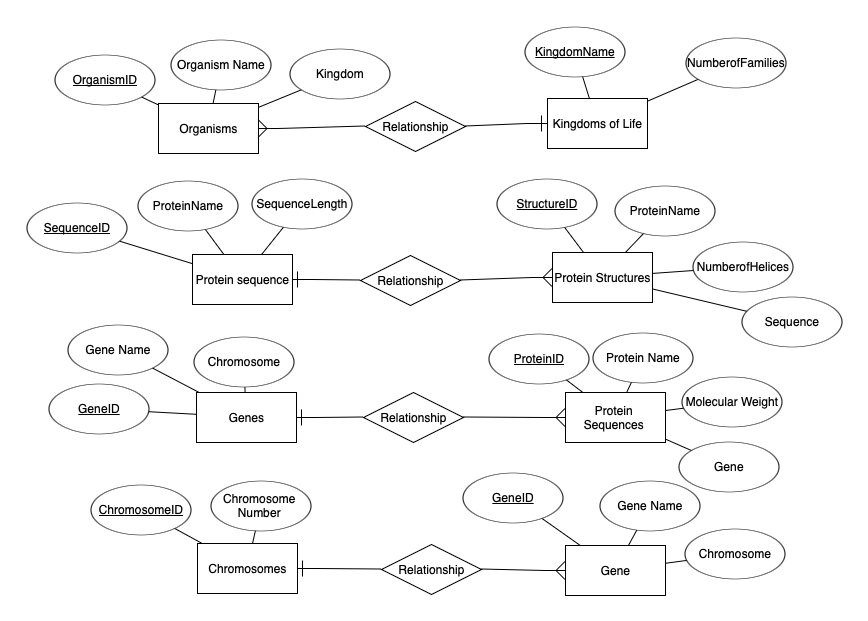

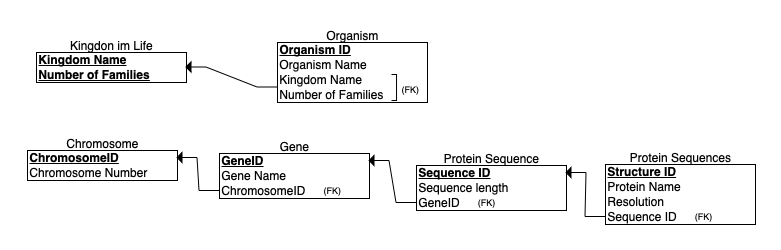

## Exercise 4 - Many-to-Many

Create a Relational scheme for each of the three databases described below:
1. A database that collects information about proteins, organic cofactors (e.g. ATP) and inorganic cofactors (e.g. Ca ions)
2. A database that collects information about proteins, organisms and the kingdoms of life
3. A database that collects information about cell lines, chemicals used in experiments and the observation of these experiments


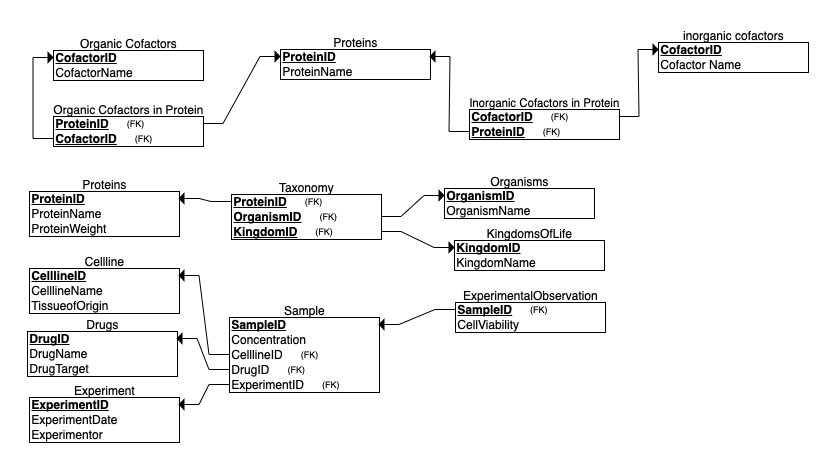